## 7406_Final_Project_US_Accidents_EDA

    

The primary goal of EDA is 

- To analyze the attributes in the US Accidents dataset 
- Get maximum insights about their distribution, missing values, correlation among other variables etc.
- Extract important variables from the dataset based on the findings above.
- Detect outliers and anomalies(if any) and determine the imputation approach for the data preparation stage.

In [1]:
import pandas as pd
import numpy as np
import datetime
import re
# import modules
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sb
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
usaccidents = pd.read_csv('US_Accidents_March23_sampled_500k.csv',parse_dates=['Start_Time'])
usaccidents.shape #500K

(500000, 46)

In [3]:
usaccidents.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


In [4]:
# convert the 'date' column to a date data type
usaccidents['Start_Time'] = pd.to_datetime(usaccidents['Start_Time'] ,utc=True,  format= 'mixed')


usaccidents['Start_Year']=usaccidents['Start_Time'].dt.year
#usaccidents['Start_Time']=usaccidents['Start_Time'].dt.date


In [5]:
usaccidents['Start_Time'].dtype

datetime64[ns, UTC]

In [6]:

usaccidents_current=usaccidents.drop_duplicates(ignore_index=False)

In [7]:
print(usaccidents_current.shape) #500_000

(500000, 47)


In [8]:
usaccidents_current.duplicated().sum()

0

<Axes: xlabel='State', ylabel='count'>

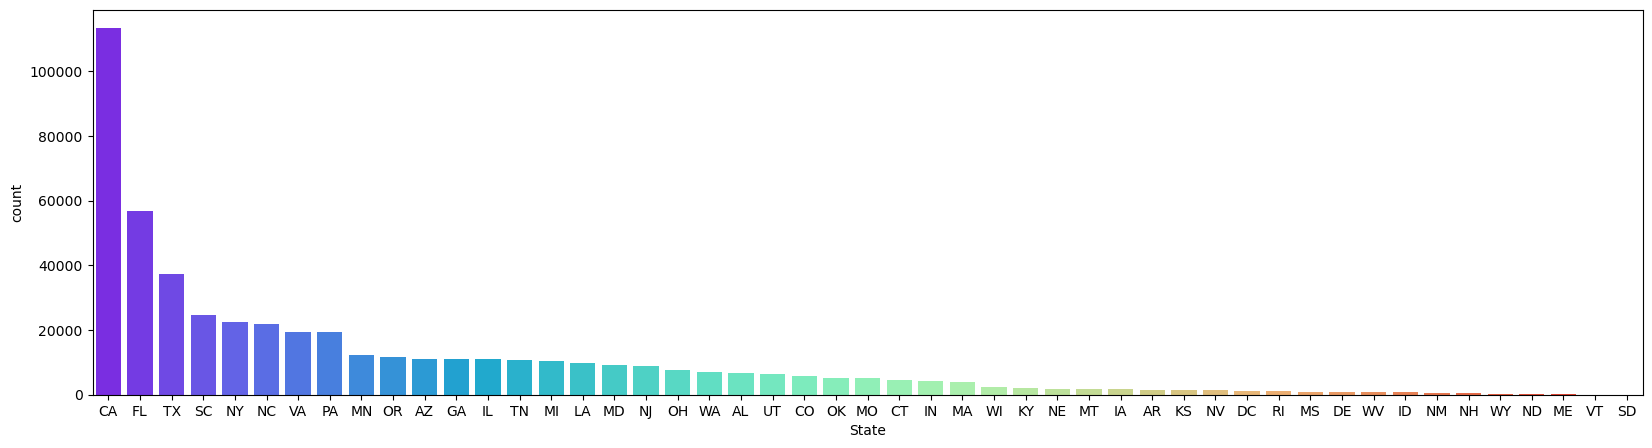

In [9]:

usaccidents_current['State'].value_counts(sort=True)

plt.figure(figsize=(20,5))
sb.countplot(x='State',data=usaccidents_current, palette="rainbow", order=usaccidents_current['State'].value_counts().index)




In [10]:
usaccidents_current=usaccidents.loc[(usaccidents['Start_Time'] >= '2020-01-01') & ((usaccidents['State'] == 'CA')\
                                 | (usaccidents['State'] == 'FL') | (usaccidents['State'] == 'TX'))]

In [11]:
# Filter data 2022 through current for CA
usaccidents_TRI = usaccidents_current.reset_index()
usaccidents_TRI.duplicated().sum()

0

In [12]:
print(usaccidents_TRI.shape) # 130661

(130661, 48)


In [13]:
usaccidents_TRI['State'].value_counts()

State
CA    70169
FL    42220
TX    18272
Name: count, dtype: int64

#### Check for duplicate rows in the dataset


In [14]:
usaccidents_df = usaccidents_TRI.loc[:, usaccidents_TRI.columns != 'ID']
dups = usaccidents_df.duplicated( )
dups.sum()

0

In [15]:
usaccidents_df1 = usaccidents_df.drop_duplicates()

In [16]:
usaccidents_df1.shape 

(130661, 47)

## Data Attributes

### Continuous:

'Start_Time': Shows start time of the accident in local time zone.

'End_Time': Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow 

'Distance(mi)': The length of the road extent affected by the accident.

'Weather_Timestamp': Shows the time-stamp of weather observation record (in local time).

'Temperature(F)':Shows the temperature (in Fahrenheit).

'Wind_Chill(F)':Shows the wind chill (in Fahrenheit).

'Humidity(%)':Shows the humidity (in percentage).

'Pressure(in)':Shows the air pressure (in inches).

'Visibility(mi)':Shows visibility (in miles).



'Wind_Speed(mph)':Shows wind speed (in miles per hour).

'Precipitation(in)': Shows precipitation amount in inches, if there is any.

### Categorical


'Number':Shows the street number in address field.

'Severity': Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the 

'Street': Shows the street name in address field.

'City': Shows the city in address field.

'County':Shows the county in address field.

'State':Shows the State in address field.

'Zipcode'Shows the Zipcode in address field.

'Wind_Direction':Shows wind direction.

'Country':Shows the Country in address field.

'Timezone': Shows timezone based on the location of the accident (eastern, central, etc.).

'Airport_Code':Denotes an airport-based weather station which is the closest one to location of the accident.

'Side':Shows the relative side of the street (Right/Left) in address field.

'Junction': A POI annotation which indicates presence of junction in a nearby location.

'No_Exit': A POI annotation which indicates presence of no_exit in a nearby location.

'Railway': A POI annotation which indicates presence of railway in a nearby location.

'Roundabout':  A POI annotation which indicates presence of roundabout in a nearby location.

'Station': A POI annotation which indicates presence of station in a nearby location.

'Stop': A POI annotation which indicates presence of stop in a nearby location.

'Bump': A POI annotation which indicates presence of speed bump or hump in a nearby location.

'Crossing': A POI annotation which indicates presence of crossing in a nearby location.

'Give way': A POI annotation which indicates presence of give_way in a nearby location.

'Traffic_Calming': A POI annotation which indicates presence of traffic_calming in a nearby location.

'Traffic_Signal': A POI annotation which indicates presence of traffic_signal in a nearby loction.

'Turning_Loop': A POI annotation which indicates presence of turning_loop in a nearby location.

'Sunrise_Sunset': Shows the period of day (i.e. day or night) based on sunrise/sunset.

'Civil_Twilight': Shows the period of day (i.e. day or night) based on civil twilight.

'Nautical_Twilight': Shows the period of day (i.e. day or night) based on nautical twilight.

'Astronomical_Twilight': Shows the period of day (i.e. day or night) based on astronomical twilight.

### Subset of the dataframe for EDA

Subset of the variables are extracted from the dataframe for analysis. 


In [17]:
df_accidents = pd.DataFrame(usaccidents_df1,columns=[ 'Severity','Start_Lng','Start_Lat','End_Lng','End_Lat','Distance(mi)','Start_Time', 'End_Time',
   'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Weather_Condition','Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
    'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)','Side', 
    'County', 'State', 'Zipcode','Junction', 'No_Exit', 'Railway', 'Roundabout','Turning_loop', 'Station', 'Stop', 'Amenity', 'Bump', 'Crossing', 'Give_Way','Traffic_Calming', 'Traffic_Signal',
             'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight'])

df_accidents.head(5)
# Features like Street, City, Number etc are ignored since they add no additional value to the dataset, since we have other core Geo featues


,Severity,Start_Lng,Start_Lat,End_Lng,End_Lat,Distance(mi),Start_Time,End_Time,Country,Timezone,...,Bump,Crossing,Give_Way,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2,-120.492822,34.661189,-120.492442,34.661189,0.022,2022-08-20 13:13:00+00:00,2022-08-20 15:22:45.000000000,US,US/Pacific,...,False,False,False,False,True,False,Day,Day,Day,Day
1,2,-118.985176,35.395484,-118.985995,35.395476,0.046,2020-12-04 01:46:00+00:00,2020-12-04 04:13:09,US,US/Pacific,...,False,False,False,False,False,False,Night,Night,Night,Night
2,2,-85.682508,30.191010,-85.682530,30.190329,0.047,2021-08-13 16:48:00+00:00,2021-08-13 19:09:09.000000000,US,US/Central,...,False,False,False,False,False,False,Day,Day,Day,Day
3,2,-96.804018,32.868947,-96.804014,32.869500,0.038,2022-10-12 13:59:30+00:00,2022-10-12 15:33:53,US,US/Central,...,False,False,False,False,False,False,Day,Day,Day,Day
4,2,-117.161407,32.771645,-117.154680,32.730856,2.845,2022-02-18 16:53:00+00:00,2022-02-18 18:59:00,US,US/Pacific,...,False,False,False,False,False,False,Day,Day,Day,Day


#### Dataframe General info 

In [18]:
df_accidents.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130661 entries, 0 to 130660
Data columns (total 43 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   Severity               130661 non-null  int64              
 1   Start_Lng              130661 non-null  float64            
 2   Start_Lat              130661 non-null  float64            
 3   End_Lng                104849 non-null  float64            
 4   End_Lat                104849 non-null  float64            
 5   Distance(mi)           130661 non-null  float64            
 6   Start_Time             130661 non-null  datetime64[ns, UTC]
 7   End_Time               130661 non-null  object             
 8   Country                130661 non-null  object             
 9   Timezone               130599 non-null  object             
 10  Airport_Code           130495 non-null  object             
 11  Weather_Timestamp      128835 non-null 

In [19]:
df_accidents.describe( )

,Severity,Start_Lng,Start_Lat,End_Lng,End_Lat,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Side,Turning_loop
count,130661.000000,130661.000000,130661.000000,104849.000000,104849.000000,130661.000000,127862.000000,126876.000000,127655.000000,128559.000000,128215.000000,127508.000000,123072.000000,0.0,0.0
mean,2.073029,-104.062150,32.422424,-104.164901,32.423863,0.643147,67.568112,67.252372,63.238675,29.655590,9.229932,7.161300,0.004984,NaN,NaN
std,0.323799,17.425060,4.183614,17.664858,4.268524,1.597945,14.642853,15.216420,22.849799,0.737947,2.325912,5.450457,0.042153,NaN,NaN
min,1.000000,-124.300653,24.574326,-124.307438,24.574505,0.000000,-35.000000,-50.000000,2.000000,19.360000,0.000000,0.000000,0.000000,NaN,NaN
25%,2.000000,-118.974838,28.551512,-119.037172,28.480500,0.008000,57.000000,57.000000,48.000000,29.560000,10.000000,3.000000,0.000000,NaN,NaN
50%,2.000000,-117.242405,33.625760,-117.304321,33.746228,0.131000,68.000000,68.000000,66.000000,29.880000,10.000000,7.000000,0.000000,NaN,NaN
75%,2.000000,-82.326764,34.867035,-81.990181,35.118438,0.613000,79.000000,79.000000,82.000000,30.020000,10.000000,10.000000,0.000000,NaN,NaN
max,4.000000,-80.038696,42.000100,-80.053500,42.003262,74.400002,207.000000,207.000000,100.000000,38.440000,100.000000,243.000000,2.570000,NaN,NaN


##### State

- Unique values for State attribute
- Count of NaN's
- Frequency of accident in each state

In [20]:
pd.unique(usaccidents_df1['State'])

array(['CA', 'FL', 'TX'], dtype=object)

In [21]:
print ('Count of NaN in State: ' + str(usaccidents_df1['State'].isna().sum()),'i.e', str(round(usaccidents_df1['State'].isna().sum()/len(usaccidents_df1),3)*100) + '%')

Count of NaN in State: 0 i.e 0.0%


In [22]:

print ('Count of NaN in County: ' + str(usaccidents_df1['County'].isna().sum()),'i.e', str(round(usaccidents_df1['County'].isna().sum()/len(usaccidents_df1),5)*100) + '%')
print ('Count of NaN in State: ' + str(usaccidents_df1['State'].isna().sum()),'i.e', str(round(usaccidents_df1['State'].isna().sum()/len(usaccidents_df1),5)*100) + '%')
print ('Count of NaN in Zipcode: ' + str(usaccidents_df1['Zipcode'].isna().sum()),'i.e', str(round(usaccidents_df1['Zipcode'].isna().sum()/len(usaccidents_df1),5)*100) + '%')


Count of NaN in County: 0 i.e 0.0%
Count of NaN in State: 0 i.e 0.0%
Count of NaN in Zipcode: 59 i.e 0.045%


We can remove the rows with NaN values for zipcodes for final data processing.

In [23]:
df_accidents__clean = usaccidents_df1.dropna(subset=['Zipcode'], how='all')
print ('Count of NaN in Zipcode: ' + str(df_accidents__clean['Zipcode'].isna().sum()),'i.e', str(round(df_accidents__clean['Zipcode'].isna().sum()/len(df_accidents__clean),3)*100) + '%')

Count of NaN in Zipcode: 0 i.e 0.0%


In [24]:
df_accidents__clean.head(2)

,index,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Year
0,2,Source1,2,2022-08-20 13:13:00+00:00,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,True,False,Day,Day,Day,Day,2022
1,4,Source1,2,2020-12-04 01:46:00+00:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,Night,Night,Night,Night,2020


The filtered dataset is below which is used for further analysis.

In [25]:
df_accidents_clean = pd.DataFrame(df_accidents__clean,columns=[ 'Severity','Start_Lng','Start_Lat','End_Lng','End_Lat','Distance(mi)','Start_Time', 'End_Time', 
   'Country',   'Weather_Timestamp', 'Weather_Condition','Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
    'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Side',  
    'County', 'State', 'Zipcode','Junction', 'No_Exit', 'Railway', 'Roundabout','Turning_loop', 'Station', 'Stop', 'Amenity', 'Bump', 'Crossing', 'Give_Way','Traffic_Calming', 'Traffic_Signal',
             'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight'])

df_accidents_clean.head(5)

,Severity,Start_Lng,Start_Lat,End_Lng,End_Lat,Distance(mi),Start_Time,End_Time,Country,Weather_Timestamp,...,Bump,Crossing,Give_Way,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2,-120.492822,34.661189,-120.492442,34.661189,0.022,2022-08-20 13:13:00+00:00,2022-08-20 15:22:45.000000000,US,2022-08-20 12:56:00,...,False,False,False,False,True,False,Day,Day,Day,Day
1,2,-118.985176,35.395484,-118.985995,35.395476,0.046,2020-12-04 01:46:00+00:00,2020-12-04 04:13:09,US,2020-12-04 01:54:00,...,False,False,False,False,False,False,Night,Night,Night,Night
2,2,-85.682508,30.191010,-85.682530,30.190329,0.047,2021-08-13 16:48:00+00:00,2021-08-13 19:09:09.000000000,US,2021-08-13 16:56:00,...,False,False,False,False,False,False,Day,Day,Day,Day
3,2,-96.804018,32.868947,-96.804014,32.869500,0.038,2022-10-12 13:59:30+00:00,2022-10-12 15:33:53,US,2022-10-12 13:53:00,...,False,False,False,False,False,False,Day,Day,Day,Day
4,2,-117.161407,32.771645,-117.154680,32.730856,2.845,2022-02-18 16:53:00+00:00,2022-02-18 18:59:00,US,2022-02-18 16:53:00,...,False,False,False,False,False,False,Day,Day,Day,Day


In [26]:
df_accidents_clean.columns

Index(['Severity', 'Start_Lng', 'Start_Lat', 'End_Lng', 'End_Lat',
       'Distance(mi)', 'Start_Time', 'End_Time', 'Country',
       'Weather_Timestamp', 'Weather_Condition', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Side',
       'County', 'State', 'Zipcode', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Turning_loop', 'Station', 'Stop', 'Amenity', 'Bump',
       'Crossing', 'Give_Way', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [27]:
df_accidents_clean.shape #130602 due to removing NULL State and Zip Code

(130602, 41)

#### Unique values of County, City and ZIpcode

There are multiple Counties and Cities in the US with same names. 

In [28]:
print("Counties: ",pd.concat([df_accidents_clean['State'],df_accidents_clean['County']]).nunique())
print("Zipcodes: ", df_accidents_clean['Zipcode'].nunique())

Counties:  260
Zipcodes:  32819


Zipcode count is not correct as there are records with zip+4 formats. 

In [29]:
df_accidents_clean['Zipcode'].unique()

array(['93436', '93305-2649', '32405-3534', ..., '77089-6254',
       '93531-1103', '33409-4712'], dtype=object)

In [30]:
# split the Zipcode column into two columns if it is in zip+4 format
df_accidents_clean[['Zipcode', 'Zipcode4']] = df_accidents_clean['Zipcode'].str.split('-', expand=True)


In [31]:
print("Counties: ",pd.concat([df_accidents_clean['State'],df_accidents_clean['County']]).nunique())
print("Zipcodes: ", df_accidents_clean['Zipcode'].nunique())

Counties:  260
Zipcodes:  3134


In [32]:
df_accidents_clean.drop('Zipcode4', axis=1, inplace=True)

In [33]:
df_accidents_clean.shape

(130602, 41)

For further analysis we will exclude all dataframe rows where all continuous variables values are Nan's.

In [34]:
print("Dataframe shape before removing null in continuous weather attributes: ", df_accidents_clean.shape)

df_accidents_clean1 = df_accidents_clean.dropna(subset=['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
    'Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)', 'Precipitation(in)'], how='all')

print("Dataframe shape after removing null in continuous weather attributes: ", df_accidents_clean1.shape)
 #128835



Dataframe shape before removing null in continuous weather attributes:  (130602, 41)
Dataframe shape after removing null in continuous weather attributes:  (128835, 41)


In [35]:
df_accidents_clean1.columns

Index(['Severity', 'Start_Lng', 'Start_Lat', 'End_Lng', 'End_Lat',
       'Distance(mi)', 'Start_Time', 'End_Time', 'Country',
       'Weather_Timestamp', 'Weather_Condition', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Side',
       'County', 'State', 'Zipcode', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Turning_loop', 'Station', 'Stop', 'Amenity', 'Bump',
       'Crossing', 'Give_Way', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [36]:
print("Number of records removed: ", df_accidents_clean.shape[0]-df_accidents_clean1.shape[0])
print("% of records removed: ", 100 * ((df_accidents_clean.shape[0]-df_accidents_clean1.shape[0])/df_accidents_clean.shape[0]), " %")

Number of records removed:  1767
% of records removed:  1.3529654982312675  %


### Distribution of the continuous attributes in the dataset


array([[<Axes: title={'center': 'Distance(mi)'}>,
        <Axes: title={'center': 'Temperature(F)'}>,
        <Axes: title={'center': 'Wind_Chill(F)'}>],
       [<Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Pressure(in)'}>,
        <Axes: title={'center': 'Visibility(mi)'}>],
       [<Axes: title={'center': 'Wind_Speed(mph)'}>,
        <Axes: title={'center': 'Precipitation(in)'}>, <Axes: >]],
      dtype=object)

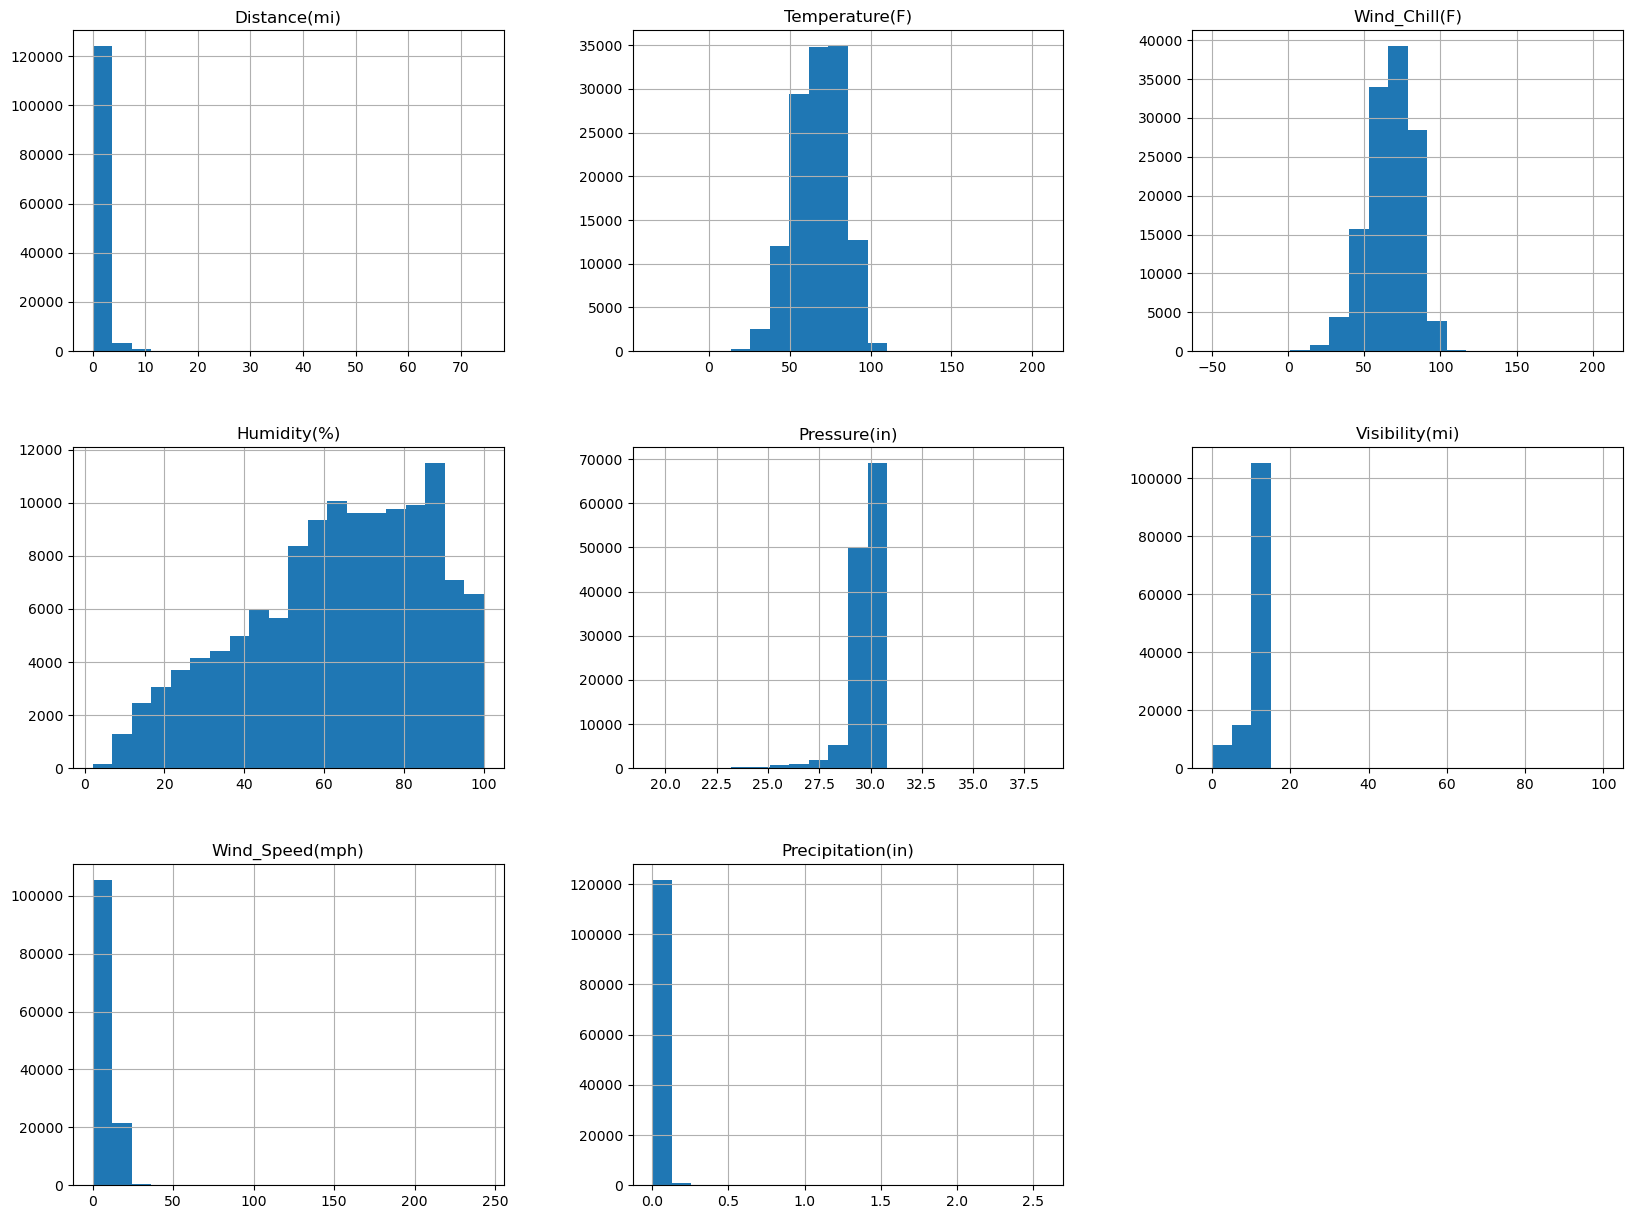

In [37]:
#variables to exclude
exclude = ['Start_Lat','Start_Lng','End_Lat','End_Lng','Side', 'State','Wind_Direction','Junction','Traffic_Calming', 'Traffic_Signal', 'Turning_loop',
    'County', 'Zipcode','Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop','Amenity', 'Bump', 'Crossing', 'Give_Way',
             'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight','Country']

df_accidents_cont = df_accidents_clean1.loc[:,[
       'Distance(mi)',   'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
        'Wind_Speed(mph)', 'Precipitation(in)' ]]
df_accidents_cont.hist(bins = 20, figsize =(20, 15))

In [38]:
df_accidents_cont.head(2)

,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,0.022,68.0,68.0,73.0,29.79,10.0,13.0,0.0
1,0.046,42.0,42.0,34.0,29.77,10.0,0.0,0.0


# Analyze correlation 

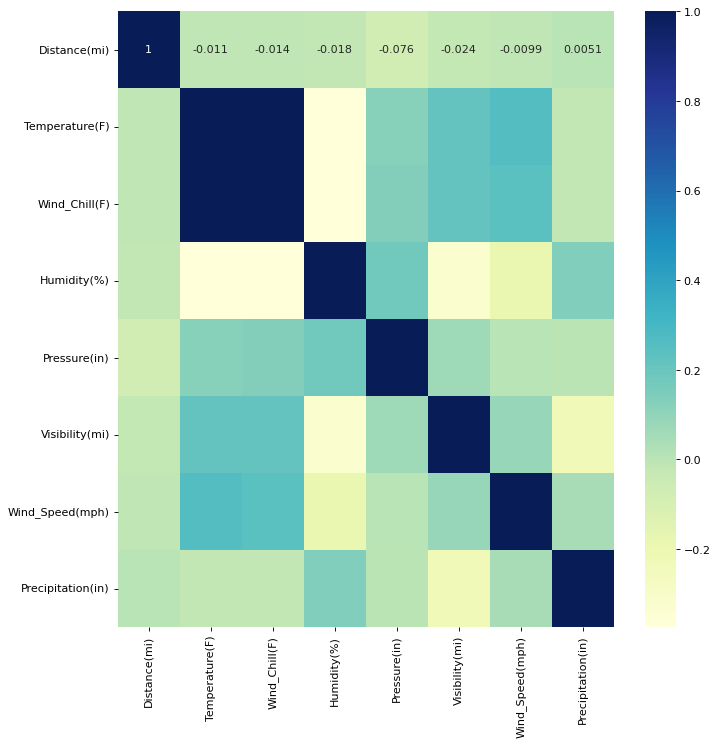

In [39]:

#print(df_accident_location.corr())
  
# plotting correlation heatmap
mp.figure(figsize=(10,10),dpi=80)
dataplot = sb.heatmap(df_accidents_cont.corr(), cmap="YlGnBu", annot=True)

  
# displaying heatmap
mp.show()

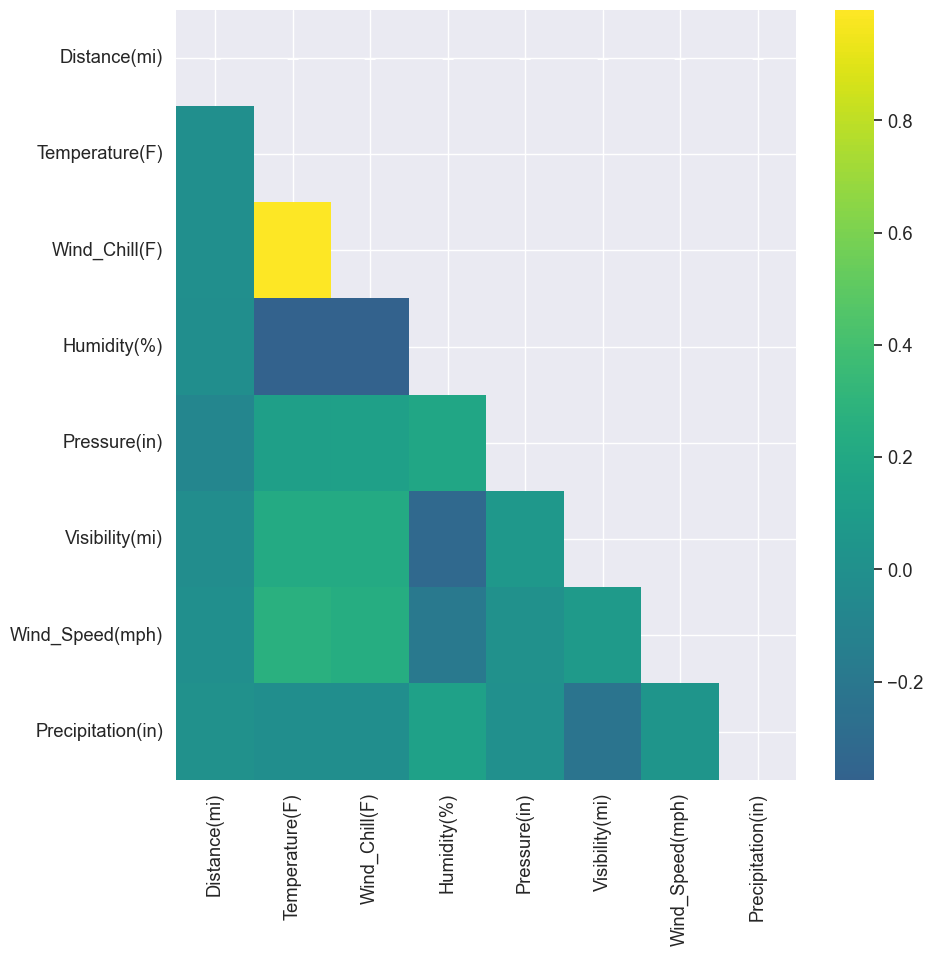

In [40]:
corr_matrix=df_accidents_cont.corr()
mask = []
for i in range(len(corr_matrix.columns)):
    mask_i = []
    for j in range(len(corr_matrix.columns)):
        if i>j:
            mask_i.append(0)
        else: 
            mask_i.append(1)
    mask.append(mask_i)
mask

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sb.set(font_scale=1.2)
sb.heatmap(corr_matrix,cmap='viridis',
            center = 0, 
            annot=True,
            fmt='.1f',
           mask=mask
           )
plt.show()

According to the correlation matrix above, we see that the **Temperature* and Wind_Chill are strongly correlated   (0.99)**. We can clearly see the positive correlation between these attributes from the scatter plot. As temperature is highly correlated with wind chill, including both variables will not bring any additional information but will increase the complexity of the algorithm, thus increasing the risk of errors. 

There is a **negative correlation between Visibility(mi) and Humidity (0.36).** We have further analyse these variables to identify any other patterns.


When variables used in clustering are collinear, some variables get a higher weight than others. If two variables are perfectly correlated, they effectively represent the same concept. But that concept is now represented twice in the data and hence gets twice the weight of all the other variables. The final solution is likely to be skewed in the direction of that concept, which could be a problem if it’s not anticipated.

There are four options to deal with collinear features:

1. Dropping enough features from the dataset to eliminate all collinearity

2. Combining the collinear features using a linear formula to create a new a feature

3. We can exclude wind chill as it is strongly correlated with temperature

4. Doing a principal component analysis (PCA) and reduce the number of features in your dataset

We will be going with the Exclusion option

In [41]:
print ('Count of NaN in Temperature: ' + str(df_accidents_cont['Temperature(F)'].isna().sum()),'i.e', str(round(df_accidents_cont['Temperature(F)'].isna().sum()/len(df_accidents_cont),3)*100) + '%')
print ('Count of NaN in Wind_Chill: ' + str(df_accidents_cont['Wind_Chill(F)'].isna().sum()),'i.e', str(round(df_accidents_cont['Wind_Chill(F)'].isna().sum()/len(df_accidents_cont),3)*100) + '%')

Count of NaN in Temperature: 973 i.e 0.8%
Count of NaN in Wind_Chill: 1959 i.e 1.5%


**We can exclude Wind Chill as it has more number of NaN's that Temperature.**

**Based on the analysis below we can clearly see the linear relationship (scatter plot) between these two variables.**

**Temperature will be more valuable in our analysis compared to Windchill.**

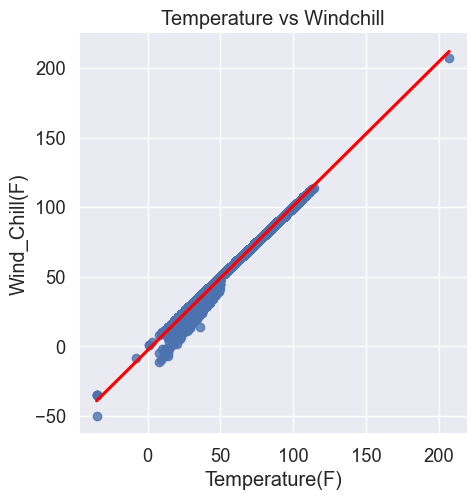

In [42]:
#df_accident_location.plot.scatter(x = 'Temperature(F)', y = 'Wind_Chill(F)',
#                  color = 'blue', title = 'Temperature vs Wind_Chill')

# use lmplot
sb.lmplot(x = 'Temperature(F)',
            y = 'Wind_Chill(F)', 
            ci = None,
            data = df_accidents_cont, line_kws={'color': 'red'}, ).set(title='Temperature vs Windchill')


**From correlation heat map we observe that there is a negative correlation between Humidity (0.37) & Temperature and negative correlation between Visibility(mi) and Humidity (0.36).**

The percentage of NaN's in both attributes are similar.

In [43]:
print ('Count of NaN in Humidity: ' + str(df_accidents_cont['Humidity(%)'].isna().sum()),'i.e', str(round(df_accidents_cont['Humidity(%)'].isna().sum()/len(df_accidents_cont),3)*100) + '%')
print ('Count of NaN in Visibility: ' + str(df_accidents_cont['Visibility(mi)'].isna().sum()),'i.e', str(round(df_accidents_cont['Visibility(mi)'].isna().sum()/len(df_accidents_cont),3)*100) + '%')

Count of NaN in Humidity: 1180 i.e 0.8999999999999999%
Count of NaN in Visibility: 620 i.e 0.5%


**There isn't a strong linear relationship between the two factors although there is some negative correlation.**

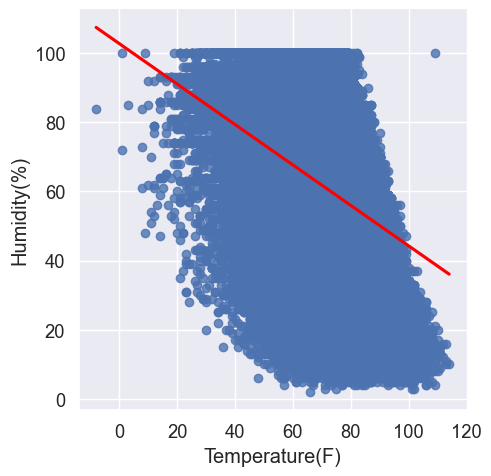

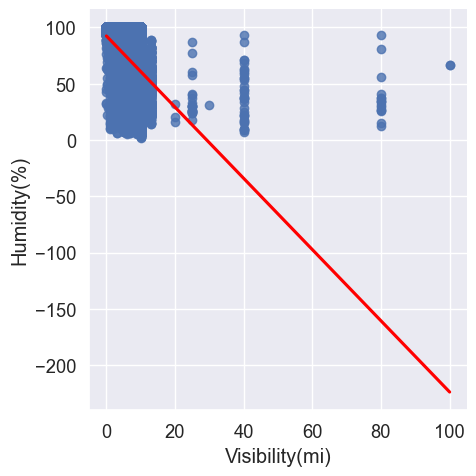

In [44]:
#df_accident_location.plot.scatter(x = 'Temperature(F)', y = 'Humidity(%)',
#                  color = 'purple', title = 'Temperature vs Humidity')

# use lmplot
sb.lmplot(x = 'Temperature(F)',
            y = 'Humidity(%)', 
            ci = None,
            data = df_accidents_cont, line_kws={'color': 'red'})

# use lmplot
sb.lmplot(x = 'Visibility(mi)',
            y = 'Humidity(%)', 
            ci = None,
            data = df_accidents_cont, line_kws={'color': 'red'})



**Based on the VIF values for continuous variables, there is a problem of multicollinearity for Temperature, Humidity and Visibility.**

A VIF of four means that the variance (a measure of imprecision) of the estimated coefficients is four times higher because of correlation between the two independent variables.

**Based on this we can exclude Humidity , Temperature or Visibility from the model.**

In [45]:

# the independent variables set
#df_x = df_accidents[['Temperature(F)', 'Humidity(%)', 'Visibility(mi)']]
df_x = df_accidents_cont[['Temperature(F)', 'Humidity(%)', 'Visibility(mi)','Precipitation(in)','Wind_Speed(mph)','Distance(mi)']]
X = df_x[~df_x.isnull().any(axis=1)]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

             feature        VIF
0     Temperature(F)  16.117709
1        Humidity(%)   5.524055
2     Visibility(mi)  13.850034
3  Precipitation(in)   1.081700
4    Wind_Speed(mph)   2.985211
5       Distance(mi)   1.155023


**From the boxplot below we see that Temperature has a lot of outliers than Visibility.**

<Axes: >

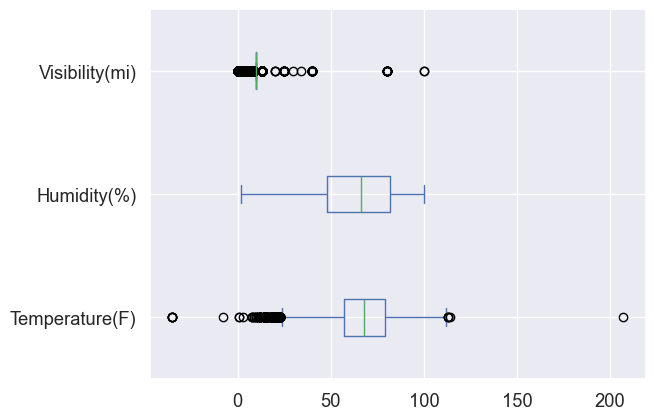

In [46]:
df_accidents_cont[['Temperature(F)','Humidity(%)','Visibility(mi)']].plot.box(vert = False, grid = True)

**There are some extreme values for temperature based on the box plot above.** 

Also, the maximum and minimum value for temperature are in the extreme ranges and definitely an outlier based on US stats.

**We have to identify the outliers and analyse whether these values are valid or need to be imputed.**

In [47]:
print(df_accidents_cont['Temperature(F)'].max())
print(df_accidents_cont['Temperature(F)'].min())

207.0
-35.0


### Temperature Histogram

###### Current distribution of temperature attribute with outliers

<Axes: title={'center': 'Temperature Distribution'}, ylabel='Frequency'>

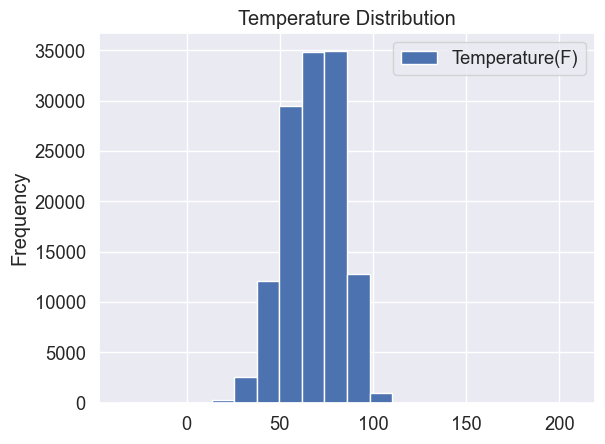

In [48]:
df_accidents_cont[['Temperature(F)']].plot.hist(bins = 20, title = 'Temperature Distribution')

#### Outlier Analysis



The interquartile range is a widely accepted method to find outliers in data. When using the interquartile range, or IQR, the full dataset is split into four equal segments, or quartiles. 

We can use it to define our outliers. For Minor Outliers (IQR x 1.5) as threshold. For Major Outliers (IQR x 3).

Below are the IQR for all continuous variables.

In [49]:
#np.quantile(data[col], 0.75)
Q1 = df_accidents_clean1['Temperature(F)'].quantile(0.25)
Q3 = df_accidents_clean1['Temperature(F)'].quantile(0.75)
#Q3 = df_accidents.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

22.0


**In order to identify extreme outliers we can use the formula below.**

**Any temperature values recorded above 128 and below -28 F is considered as outliers.**

In [50]:
#df_accident_location['Temperature(F)']
print("Lower Range: ", Q1 - 3 * IQR)
print("Upper Range: ", Q1 + 3 * IQR)

Lower Range:  -9.0
Upper Range:  123.0


The Temperature values outside the Inter quartile range, using the major outlier threshold, we have identified 21 data points that can be eliminated or imputed with median value or regression.

In [51]:
#df_temp_outliers = df_accident_location[((df_accident_location['Temperature(F)'] < (Q1['Temperature(F)'] - 1.5 * IQR['Temperature(F)'])) |(df_accident_location['Temperature(F)'] > (Q1['Temperature(F)'] + 1.5 * IQR['Temperature(F)'])))]
df_temp_outliers = df_accidents_clean1[((df_accidents_clean1['Temperature(F)'] < (Q1 - 3 * IQR)) |(df_accidents_clean1['Temperature(F)'] > (Q1 + 3 * IQR)))]
print(df_temp_outliers.shape)
out_index_temp = df_temp_outliers['Temperature(F)'].index.tolist()
df_temp_outliers.head(5)

(6, 41)


,Severity,Start_Lng,Start_Lat,End_Lng,End_Lat,Distance(mi),Start_Time,End_Time,Country,Weather_Timestamp,...,Bump,Crossing,Give_Way,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
37,2,-82.453656,27.974668,-82.474802,27.956134,1.818,2022-09-07 06:17:00+00:00,2022-09-07 09:48:47,US,2022-09-07 06:15:00,...,False,False,False,False,False,False,Night,Night,Night,Day
36913,2,-82.357773,27.995848,NaN,NaN,0.000,2022-08-30 08:17:54+00:00,2022-08-30 08:46:39,US,2022-08-30 08:15:00,...,False,False,False,False,False,False,Day,Day,Day,Day
50601,2,-117.238034,34.066720,-117.238394,34.066722,0.021,2023-02-22 19:24:00+00:00,2023-02-22 21:32:35.000000000,US,2023-02-22 19:54:00,...,False,False,False,False,False,False,Night,Night,Night,Night
88114,2,-82.346927,27.846605,-82.346514,27.856619,0.692,2022-09-05 22:30:00+00:00,2022-09-05 23:47:31,US,2022-09-05 22:35:00,...,False,False,False,False,False,False,Night,Night,Night,Night
111272,2,-82.353698,28.057655,-82.352958,28.080485,1.578,2022-08-24 08:30:00+00:00,2022-08-24 11:22:56,US,2022-08-24 08:35:00,...,False,False,False,False,False,False,Day,Day,Day,Day


Median temperature from the dataframe is 68 deg F

In [52]:
median_temp = df_accidents_clean1['Temperature(F)'].median(skipna = True)
df_accidents_to_impute = df_accidents_clean1
df_accidents_clean1.loc[out_index_temp,'Temperature(F)'] = median_temp
median_temp

68.0

#### Imputation methods:

Filling the missing data with the mean or median value if it’s a numerical variable.

Filling the missing data with mode if it’s a categorical value.

Filling with a Regression Model: In this case, the null values in one column are filled by fitting a regression model using other columns in the dataset.

Using the median value to impute the Temperature values.

Observe that temperature  distribution looks much better and the box plot shows that the major outliers have been imputed successfully.

We will use the cleaned **dataset df_accidents_clean1** for imputation.

### Temperature distribution after imputation

<Axes: >

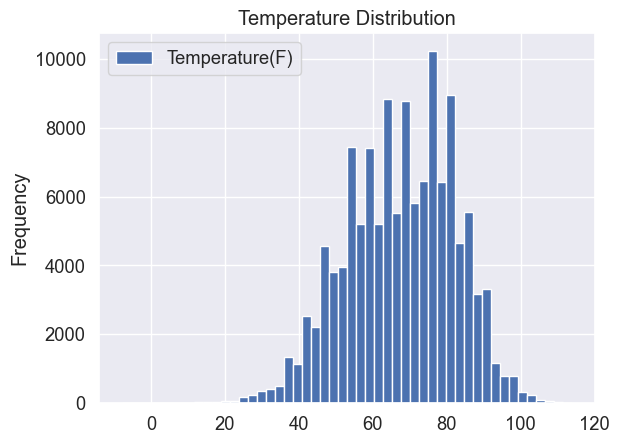

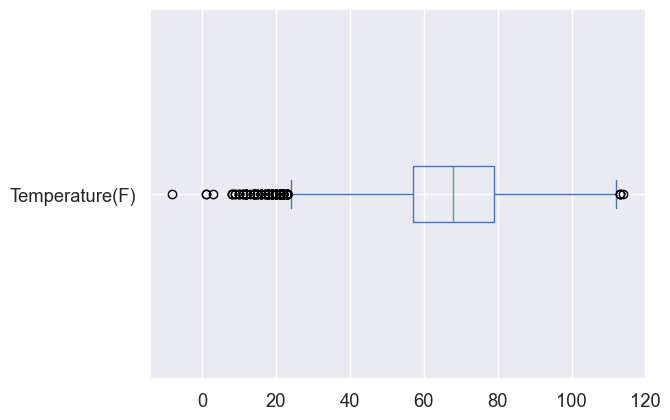

In [53]:
df_accidents_clean1[['Temperature(F)']].plot.hist(bins = 50, title = 'Temperature Distribution')
df_accidents_clean1[['Temperature(F)']].plot.box(vert = False, grid = True)

### Wind Speed

Similar analysis for Wind speed, Visibility and Pressure is below.

Observe that Windspeed has many outliers and the distribution is skewed.

In [54]:
#np.quantile(data[col], 0.75)
Q1 = df_accidents_clean1['Wind_Speed(mph)'].quantile(0.25)
Q3 = df_accidents_clean1['Wind_Speed(mph)'].quantile(0.75)
#Q3 = df_accidents.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

7.0


<Axes: title={'center': 'Windspeed Distribution'}, ylabel='Frequency'>

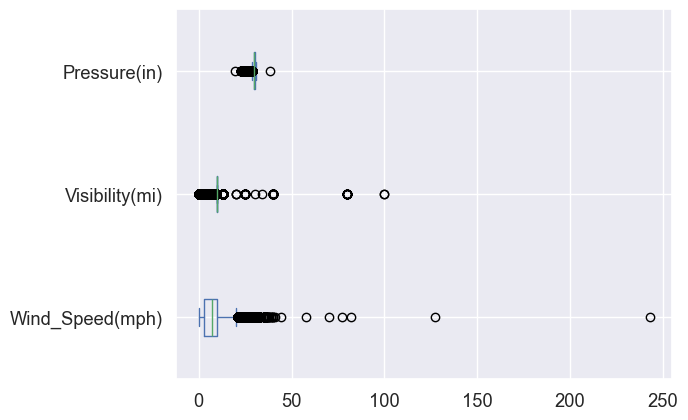

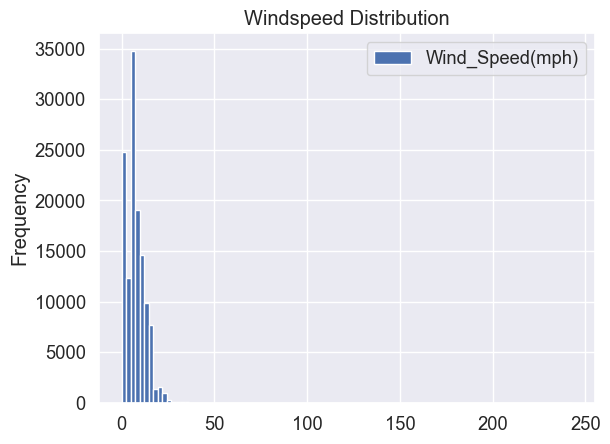

In [55]:
df_accidents_clean1[['Wind_Speed(mph)','Visibility(mi)','Pressure(in)']].plot.box(vert = False, grid = True)
df_accidents_clean1[['Wind_Speed(mph)']].plot.hist(bins = 100, title = 'Windspeed Distribution')

Further analysis is need to identify if the outliers can be eliminated or imputed. There are major outliers based on the max value below.

In [56]:
print(df_accidents_clean1['Wind_Speed(mph)'].max())
print(df_accidents_clean1['Wind_Speed(mph)'].min())

243.0
0.0


In [57]:
#df_temp_outliers = df_accident_location[((df_accident_location['Temperature(F)'] < (Q1['Temperature(F)'] - 1.5 * IQR['Temperature(F)'])) |(df_accident_location['Temperature(F)'] > (Q1['Temperature(F)'] + 1.5 * IQR['Temperature(F)'])))]
df_wind_chill_outliers = df_accidents_clean1[((df_accidents_clean1['Wind_Speed(mph)'] < (Q1 - 3 * IQR)) |(df_accidents_clean1['Wind_Speed(mph)'] > (Q1 + 3 * IQR)))]
print(df_wind_chill_outliers.shape)

df_wind_chill_outliers.head(5)

(528, 41)


,Severity,Start_Lng,Start_Lat,End_Lng,End_Lat,Distance(mi),Start_Time,End_Time,Country,Weather_Timestamp,...,Bump,Crossing,Give_Way,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
222,2,-118.858214,34.795679,-118.852682,34.794994,0.317,2020-12-07 14:49:00+00:00,2020-12-07 18:04:09,US,2020-12-07 14:53:00,...,False,False,False,False,False,False,Day,Day,Day,Day
304,2,-122.407989,37.738640,-122.407989,37.738640,0.000,2020-02-02 15:21:00+00:00,2020-02-02 16:13:59,US,2020-02-02 14:56:00,...,False,False,False,False,False,False,Day,Day,Day,Day
316,2,-81.632484,30.517643,-81.622584,30.517766,0.589,2022-07-07 16:45:18+00:00,2022-07-07 17:28:46.000000000,US,2022-07-07 16:56:00,...,False,False,False,False,False,False,Day,Day,Day,Day
450,2,-121.891760,37.322868,-121.883027,37.309336,1.051,2023-02-21 18:13:00+00:00,2023-02-21 19:15:00,US,2023-02-21 17:53:00,...,False,False,False,False,False,False,Night,Day,Day,Day
1005,2,-117.479381,34.150312,-117.535997,34.103292,4.587,2023-01-26 06:24:00+00:00,2023-01-26 09:24:00.000000000,US,2023-01-26 06:53:00,...,False,False,False,False,False,False,Night,Day,Day,Day


**The windspeed values based on major outlier threshold for IQR are valid values and not all should be excluded.**

After further research, The strongest wind ever recorded in the United States (not including tornadoes or hurricanes) was recorded at the summit of Mount Washington, New Hampshire, one of the windiest places on earth. On April 12th, 1934, a wind gust was recorded at 231 mph!. 

Based on this information we will keep high values and remove only the extremes.

The extreme values above 231 mph should be imputed using median values or using regression. 

In [58]:
df_wind_speed_outliers = df_accidents_clean1[((df_accidents_clean1['Wind_Speed(mph)'] < (Q1 - 3 * IQR)) |(df_accidents_clean1['Wind_Speed(mph)'] > (Q1 + 3 * IQR)))]

print(df_wind_speed_outliers.shape)

df_wind_speed_outliers = df_wind_speed_outliers[df_wind_speed_outliers['Wind_Speed(mph)']>231]

print(df_wind_speed_outliers.shape)

(528, 41)
(1, 41)


We can impute these values using the median.

In [59]:

df_wind_speed_out  = df_wind_speed_outliers[['Temperature(F)', "Humidity(%)", "Pressure(in)", "Visibility(mi)", 'Wind_Speed(mph)']]


out_index = df_wind_speed_out.index[df_wind_speed_out['Wind_Speed(mph)']>231].tolist()
 
print(out_index)

[29134]


In [60]:

median_windspeed = df_accidents_clean1['Wind_Speed(mph)'].median(skipna = True)

df_median = pd.DataFrame(np.repeat(median_windspeed,len(out_index)))
#df_new = df_accident_location.replace(df_accident_location[[out_index,'Wind_Speed(mph)']],df_median)

#imputing the data in the cleaned data set.
df_accidents_clean1.loc[out_index,'Wind_Speed(mph)'] = median_windspeed

#df_accident_location.loc[out_index,'Wind_Speed(mph)']
#print(dfnew.loc[out_index,'Wind_Speed(mph)'])


In [61]:
median_windspeed

7.0

<Axes: >

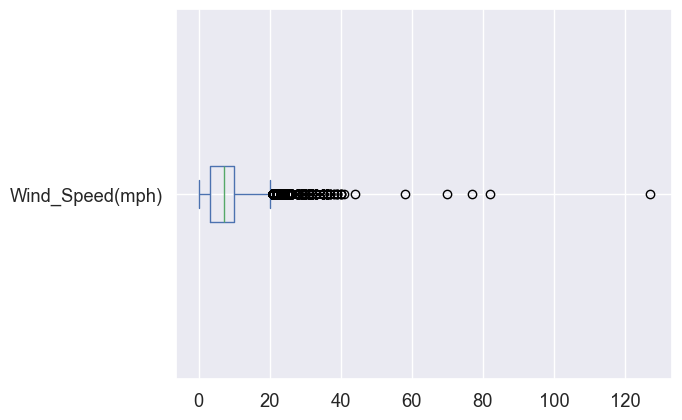

In [62]:
df_accidents_clean1[['Wind_Speed(mph)']].plot.box(vert = False, grid = True)

### Wind Speed Distribution after imputation

<Axes: title={'center': 'Windspeed Distribution'}, ylabel='Frequency'>

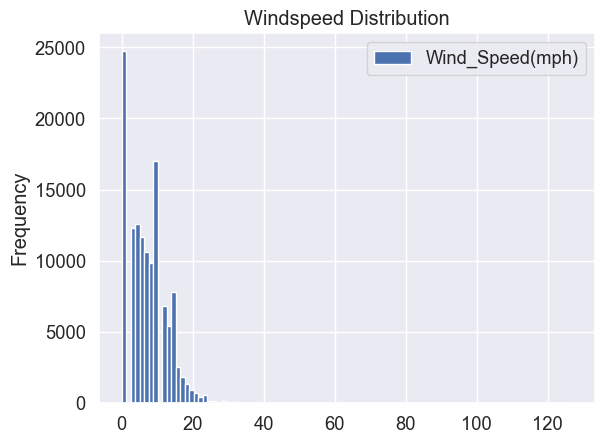

In [63]:
df_accidents_clean1[['Wind_Speed(mph)']].plot.hist(bins = 100, title = 'Windspeed Distribution')

### Pressure

In [64]:
print(df_accidents_clean1['Pressure(in)'].max())
print(df_accidents_clean1['Pressure(in)'].min())

38.44
19.36


In [65]:
#np.quantile(data[col], 0.75)
Q1 = df_accidents_clean1['Pressure(in)'].quantile(0.25)
Q3 = df_accidents_clean1['Pressure(in)'].quantile(0.75)
#Q3 = df_accidents.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.46000000000000085


The highest pressure ever recorded in the lower 48 states occurred in December 1983 in Miles City, Montana, where it reached 1,064 mb, or 31.42 inHg, during a severe cold wave.

In [66]:
#df_temp_outliers = df_accident_location[((df_accident_location['Temperature(F)'] < (Q1['Temperature(F)'] - 1.5 * IQR['Temperature(F)'])) |(df_accident_location['Temperature(F)'] > (Q1['Temperature(F)'] + 1.5 * IQR['Temperature(F)'])))]
df_pressure_outliers = df_accidents_clean1[((df_accidents_clean1['Pressure(in)'] < (Q1 - 3 * IQR)) |(df_accidents_clean1['Pressure(in)'] > (Q1 + 3 * IQR)))]
print(df_pressure_outliers.shape)

df_pressure_outliers.head(5)

(4423, 41)


,Severity,Start_Lng,Start_Lat,End_Lng,End_Lat,Distance(mi),Start_Time,End_Time,Country,Weather_Timestamp,...,Bump,Crossing,Give_Way,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
14,2,-120.699496,39.285621,-120.683748,39.291802,0.944,2022-06-17 16:29:00+00:00,2022-06-17 16:41:30,US,2022-06-17 16:52:00,...,False,False,False,False,False,False,Day,Day,Day,Day
57,2,-117.927729,35.547777,-117.906649,35.594357,3.429,2021-09-24 21:49:00+00:00,2021-09-24 23:54:01,US,2021-09-24 21:56:00,...,False,False,False,False,False,False,Night,Night,Night,Night
63,2,-118.170801,34.773606,-118.170631,34.751526,1.526,2021-11-29 09:19:00+00:00,2021-11-29 11:44:19,US,2021-11-29 08:56:00,...,False,False,False,False,False,False,Day,Day,Day,Day
99,2,-121.950355,41.262577,-121.987325,41.259287,1.934,2021-01-28 03:19:00+00:00,2021-01-28 08:08:24,US,2021-01-28 03:16:00,...,False,False,False,False,False,False,Night,Night,Night,Night
158,2,-120.488681,39.311775,-120.449821,39.313685,2.082,2021-12-12 15:28:00+00:00,2021-12-12 17:34:11,US,2021-12-12 15:50:00,...,False,False,False,False,False,False,Day,Day,Day,Day


In [67]:
df_pressure_outliers = df_pressure_outliers[(df_pressure_outliers['Pressure(in)']<18) | (df_pressure_outliers['Pressure(in)']> 32) ]

print(df_pressure_outliers.shape)

#df_pressure_outliers

(1, 41)


In [68]:
out_index_pressure = df_pressure_outliers.index[(df_pressure_outliers['Pressure(in)']<18) | (df_pressure_outliers['Pressure(in)']> 32)].tolist()
 
print(out_index_pressure)

[48437]


In [69]:
median_pressure = df_accidents_clean1['Pressure(in)'].median(skipna = True)
df_accidents_clean1.loc[out_index_pressure,'Pressure(in)'] = median_pressure
median_pressure

29.88

<Axes: >

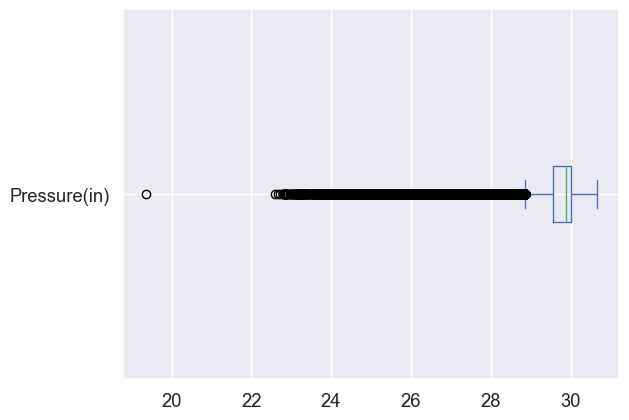

In [70]:
df_accidents_clean1[['Pressure(in)']].plot.box(vert = False, grid = True)

### Air Pressure distribution

<Axes: title={'center': 'Air pressure Distribution'}, ylabel='Frequency'>

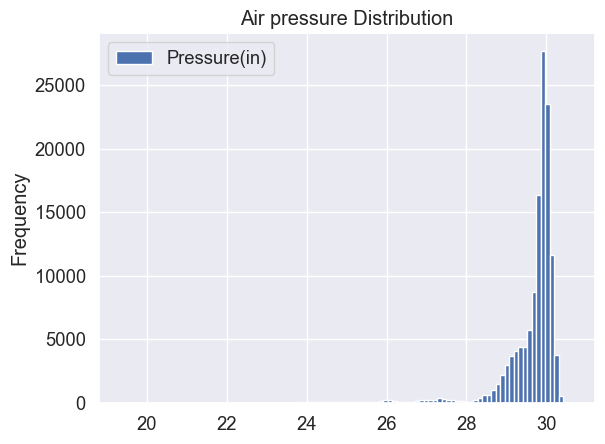

In [71]:
df_accidents_clean1[['Pressure(in)']].plot.hist(bins = 100, title = 'Air pressure Distribution')

### Precipitation distribution

<Axes: title={'center': 'Precipitation Distribution'}, ylabel='Frequency'>

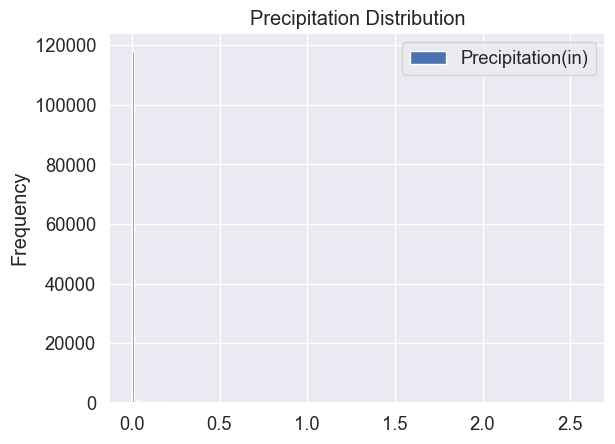

In [72]:
df_accidents_clean1[['Precipitation(in)']].plot.hist(bins = 200, title = 'Precipitation Distribution')

In [73]:
print(df_accidents_clean1['Precipitation(in)'].max())
print(df_accidents_clean1['Precipitation(in)'].min())

2.57
0.0


In [74]:
#np.quantile(data[col], 0.75)
Q1 = df_accidents_clean1['Precipitation(in)'].quantile(0.25)
Q3 = df_accidents_clean1['Precipitation(in)'].quantile(0.75)
#Q3 = df_accidents.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.0


Precipitation data shows $689645$ records with value 0.0. Also, we observed that the data attribute 'Weather_condition' is inconsistent with this value, for e.g.  records with light rain were still showing 0.0 precipitation.

In [75]:
print("Unique values for precipitation: ",df_accidents_clean1['Precipitation(in)'].nunique())
print(df_accidents_clean1['Precipitation(in)'].value_counts())

Unique values for precipitation:  115
Precipitation(in)
0.00    116488
0.01      1652
0.02       776
0.03       582
0.04       453
         ...  
0.69         1
0.99         1
1.34         1
1.53         1
1.31         1
Name: count, Length: 115, dtype: int64


### Humidity and Visibility

In [76]:
print ('Count of NaN in Humidity: ' + str(df_accidents_clean1['Humidity(%)'].isna().sum()),'i.e', str(round(df_accidents_clean1['Humidity(%)'].isna().sum()/len(df_accidents_clean1),3)*100) + '%')
print ('Count of NaN in Visibility: ' + str(df_accidents_clean1['Visibility(mi)'].isna().sum()),'i.e', str(round(df_accidents_clean1['Visibility(mi)'].isna().sum()/len(df_accidents_clean1),3)*100) + '%')

Count of NaN in Humidity: 1180 i.e 0.8999999999999999%
Count of NaN in Visibility: 620 i.e 0.5%


<Axes: >

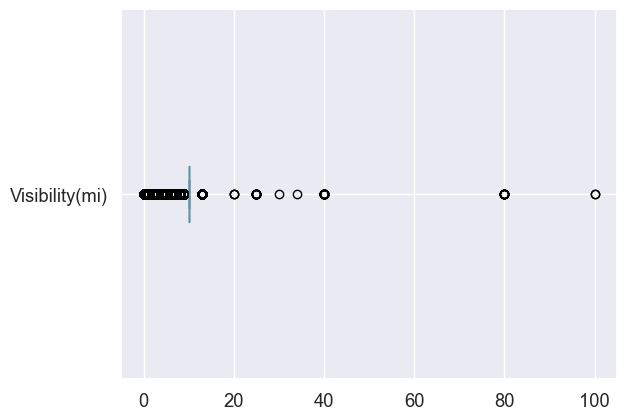

In [77]:
df_accidents_clean1[['Visibility(mi)']].plot.box(vert = False, grid = True)

In [78]:
df_accidents_clean1['Humidity(%)'].head(10)
print(df_accidents_clean1['Humidity(%)'].max())
print(df_accidents_clean1['Humidity(%)'].min())
#df_accident_location['Visibility(mi)'].head(10)

100.0
2.0


In [79]:
#np.quantile(data[col], 0.75)
Q1 = df_accidents_clean1['Humidity(%)'].quantile(0.25)
Q3 = df_accidents_clean1['Humidity(%)'].quantile(0.75)
#Q3 = df_accidents.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


34.0


Based on the general data for humidity, all the values are within interquartile range and no major outliers are identified.

California - 61.00%

Visibility does have many outliers so further analysis is required to identify the outliers

In [80]:
print(df_accidents_clean1['Visibility(mi)'].max())
print(df_accidents_clean1['Visibility(mi)'].min())

100.0
0.0


In [81]:
rslt_df = df_accidents_clean1[df_accidents_clean1['Visibility(mi)'] > 100]
rslt_df

,Severity,Start_Lng,Start_Lat,End_Lng,End_Lat,Distance(mi),Start_Time,End_Time,Country,Weather_Timestamp,...,Bump,Crossing,Give_Way,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight


In [82]:
Q1 = df_accidents_clean1['Visibility(mi)'].quantile(0.25)
Q3 = df_accidents_clean1['Visibility(mi)'].quantile(0.75)
#Q3 = df_accidents.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.0


In [83]:
filtered_df = df_accidents_clean1[df_accidents_clean1[['Visibility(mi)']].notnull().all(1)]
filtered_df.head(10)
data = filtered_df['Visibility(mi)']
#data

In [84]:
df_visibility_outliers = filtered_df[((filtered_df['Visibility(mi)'] < (Q1 - 3 * IQR)) |(filtered_df['Visibility(mi)'] > (Q1 + 3 * IQR)))]

print(df_visibility_outliers.shape)

(23112, 41)


As this is a lot of records, we cannot exclude the data. We can use filters to identify very extreme values and impute them using median values from the dataset. Further we have to research the maximum possible value for visibility to filter the extreme values.

From Wikipedia; https://en.wikipedia.org/wiki/Visibility

Very low visibility
Visibility of less than 100 metres (330 ft) is usually reported as zero. In these conditions, roads may be closed, or automatic warning lights and signs may be activated to warn drivers. 

In [85]:
out_index_visibility = df_visibility_outliers.index[(df_visibility_outliers['Visibility(mi)']<0) | (df_visibility_outliers['Visibility(mi)']> 50)].tolist()
median_visibility = df_accidents_clean1['Visibility(mi)'].median(skipna = True)
#print(out_index_visibility)

In [86]:
median_visibility = df_accidents_clean1['Visibility(mi)'].median(skipna = True)
df_accidents_clean1.loc[out_index_visibility,'Visibility(mi)'] = median_visibility
median_visibility

10.0

<Axes: >

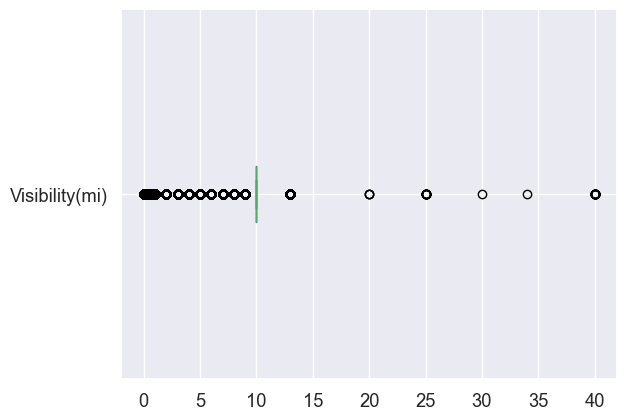

In [87]:
df_accidents_clean1[['Visibility(mi)']].plot.box(vert = False, grid = True)

array([[<Axes: title={'center': 'Distance(mi)'}>,
        <Axes: title={'center': 'Temperature(F)'}>,
        <Axes: title={'center': 'Wind_Chill(F)'}>],
       [<Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Pressure(in)'}>,
        <Axes: title={'center': 'Visibility(mi)'}>],
       [<Axes: title={'center': 'Wind_Speed(mph)'}>,
        <Axes: title={'center': 'Precipitation(in)'}>, <Axes: >]],
      dtype=object)

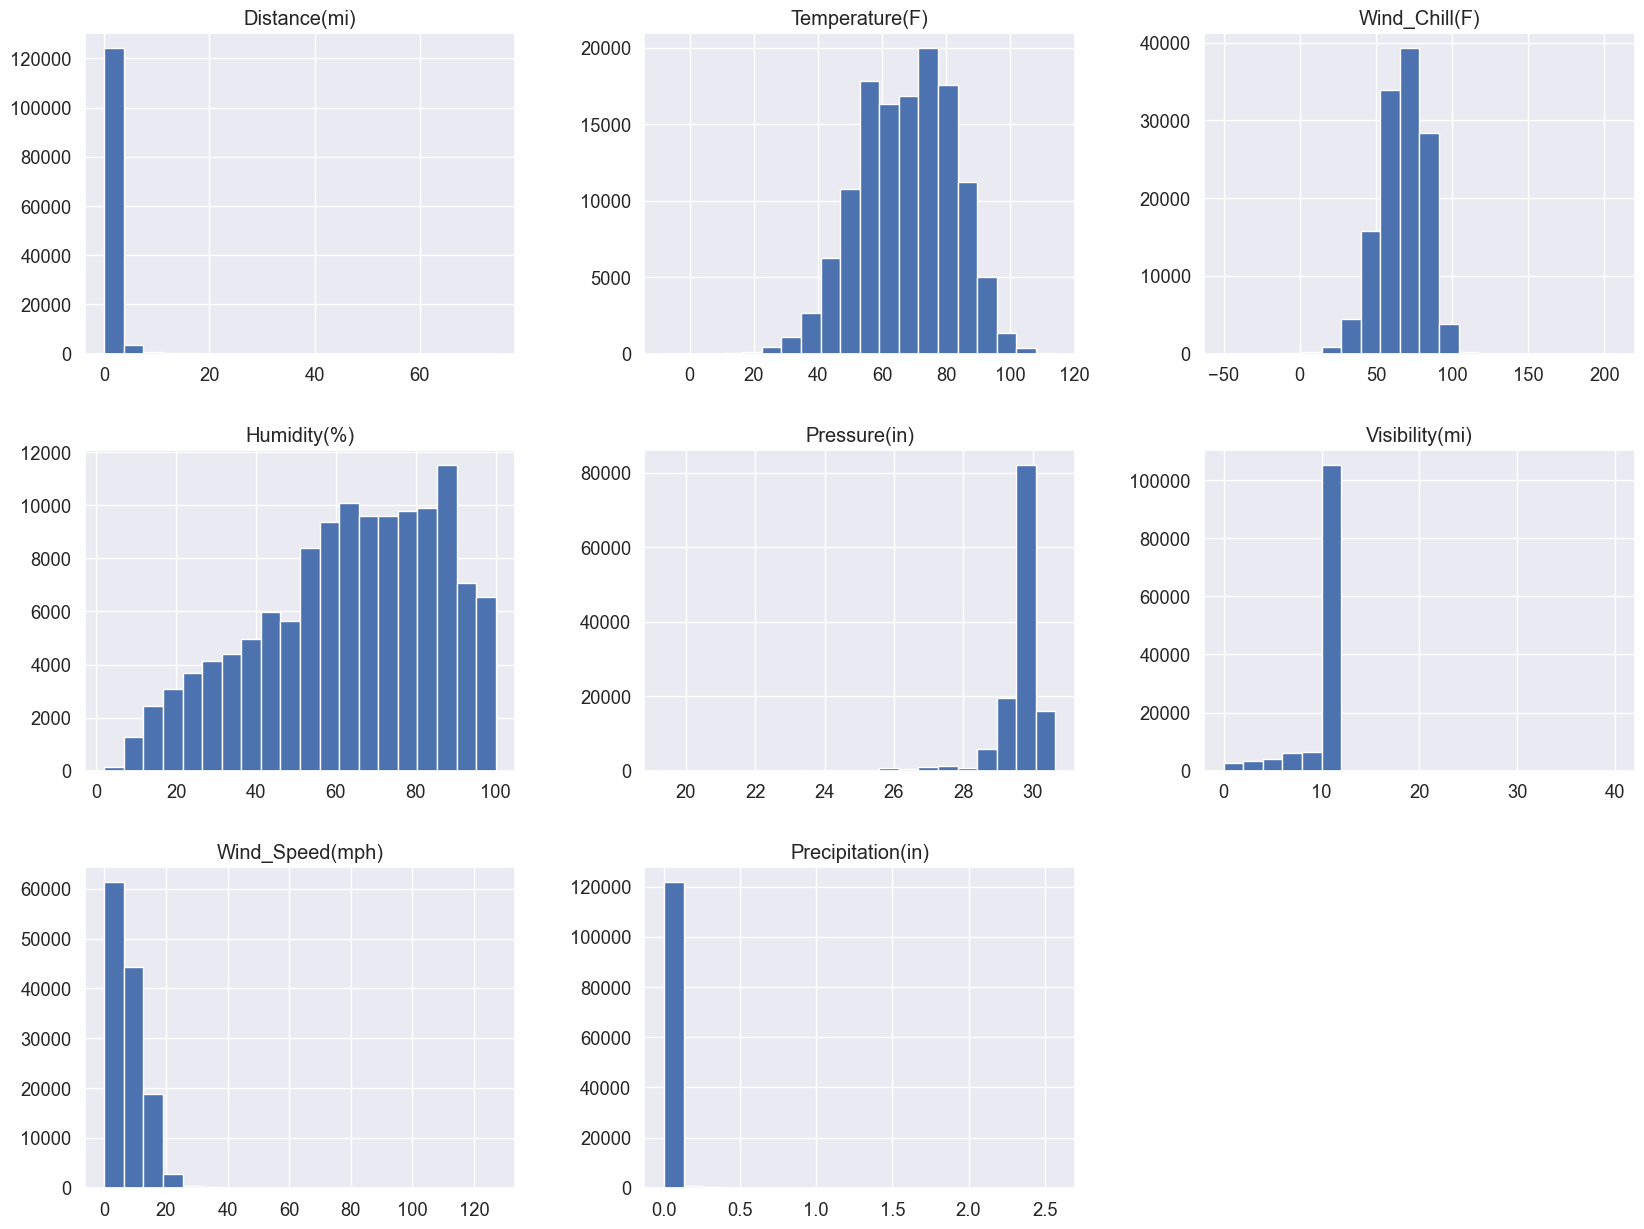

In [88]:
df_accidents_cont = df_accidents_clean1.loc[:,[
       'Distance(mi)',   'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
        'Wind_Speed(mph)', 'Precipitation(in)' ]]
df_accidents_cont.hist(bins = 20, figsize =(20, 15))

### Visibility distribution

<Axes: title={'center': 'Visibility Distribution'}, ylabel='Frequency'>

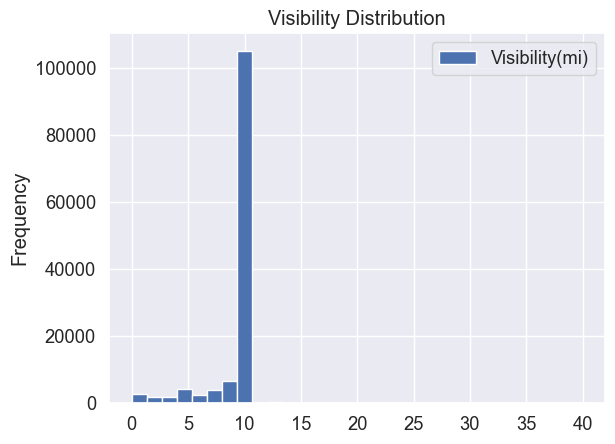

In [89]:
# Generate histogram/distribution plot
#sb.lmplot(df_accidents['Visibility(mi)'],bins=30)
df_accidents_clean1[['Visibility(mi)']].plot.hist(bins = 30, title = 'Visibility Distribution')

After analyzing humidity and visibility attributes, we observed that both Humidity (- 0.37) and Visibility (-0.36) are correlated with temperature and with each other. Further, looking at VIF values we see that VIF values are above 4 for all three variables. As we are including temperature as one of the key attributes, we have to exclude Humidity and Visibility from the dataset. 

VIF excluding Humidity

In [90]:

# the independent variables set
#df_x = df_accidents[['Temperature(F)', 'Humidity(%)', 'Visibility(mi)']]
df_x = df_accidents_clean1[['Temperature(F)', 'Visibility(mi)','Wind_Speed(mph)','Distance(mi)']]
X = df_x[~df_x.isnull().any(axis=1)]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)



           feature        VIF
0   Temperature(F)  15.482699
1   Visibility(mi)  13.794309
2  Wind_Speed(mph)   2.971931
3     Distance(mi)   1.154373


VIF Excluding both visibility and humidity

In [91]:
# the independent variables set
#df_x = df_accidents[['Temperature(F)', 'Humidity(%)', 'Visibility(mi)']]
df_x = df_accidents_clean1[['Temperature(F)','Wind_Speed(mph)','Distance(mi)']]
X = df_x[~df_x.isnull().any(axis=1)]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)



           feature       VIF
0   Temperature(F)  3.122695
1  Wind_Speed(mph)  2.965499
2     Distance(mi)  1.151855


## Analysis of Categorical Variables

In [92]:
# Does the features have NaN values?
print("NaN counts :\n", df_accidents_clean1[['Severity','Weather_Condition','Side','Wind_Direction','Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Crossing','Traffic_Calming', 'Traffic_Signal',
             'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight']].isna().sum())

NaN counts :
 Severity                      0
Weather_Condition           491
Side                     128835
Wind_Direction             1327
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Crossing                      0
Traffic_Calming               0
Traffic_Signal                0
Turning_Loop                  0
Sunrise_Sunset              350
Civil_Twilight              350
Nautical_Twilight           350
Astronomical_Twilight       350
dtype: int64


In [93]:
df_accidents_clean1.columns

Index(['Severity', 'Start_Lng', 'Start_Lat', 'End_Lng', 'End_Lat',
       'Distance(mi)', 'Start_Time', 'End_Time', 'Country',
       'Weather_Timestamp', 'Weather_Condition', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Side',
       'County', 'State', 'Zipcode', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Turning_loop', 'Station', 'Stop', 'Amenity', 'Bump',
       'Crossing', 'Give_Way', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Severity

Majority of the accidents are classied as Severity level = 2

<Axes: xlabel='Severity', ylabel='count'>

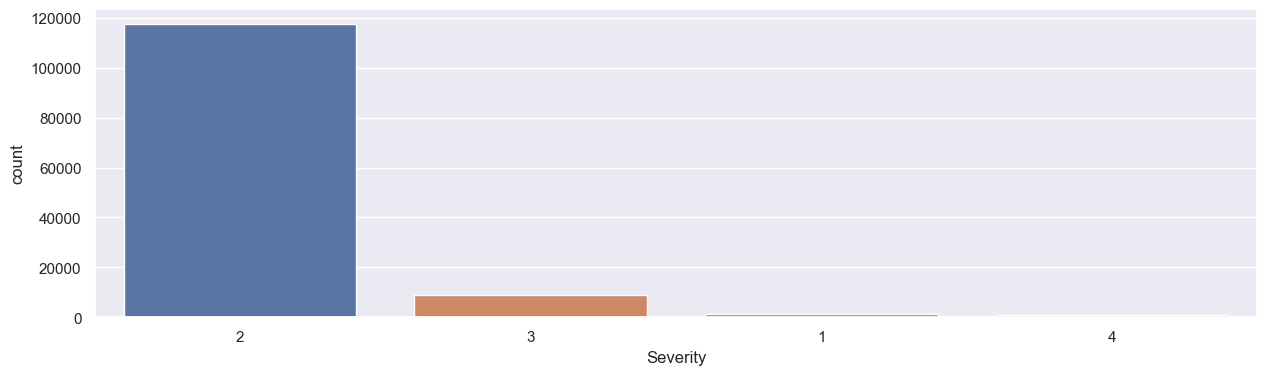

In [94]:

#define figure size
sb.set(rc={"figure.figsize":(15, 4)}) #width=8, height=4
sb.countplot(data = df_accidents_clean1, x = 'Severity', order = df_accidents_clean1['Severity'].value_counts().index)

### Wind Direction

Different wind directions as per https://windy.app/blog/what-is-wind-direction.html

0° — north wind (N)
22.5° — north-northeast wind (NNE)
45° — northeast wind (NE)
67.5° — east-northeast wind (ENE)
90°— east wind (E)
112.5° — east-southeast wind (ESE)
135° — southeast wind (SE)
157.5° — south-southeast wind (SSE)
180° — south wind (S)
202.5° — south-southwest wind (SSW)
225° — southwest wind (SW)
247.5° — west-southwest wind (WSW)
270° — west wind (W)
292.5° — west-northwest wind (WNW)
315° — northwest wind (NW)
337.5° — north-northwest wind (NNW)
360° — north wind (N)

In [95]:
wind_direction_cnt = df_accidents_clean1['Wind_Direction'].nunique()
print("Unique Wind directions: ", wind_direction_cnt)
wind_direction_vals = df_accidents_clean1['Wind_Direction'].unique()

Unique Wind directions:  18


<Axes: xlabel='Wind_Direction', ylabel='count'>

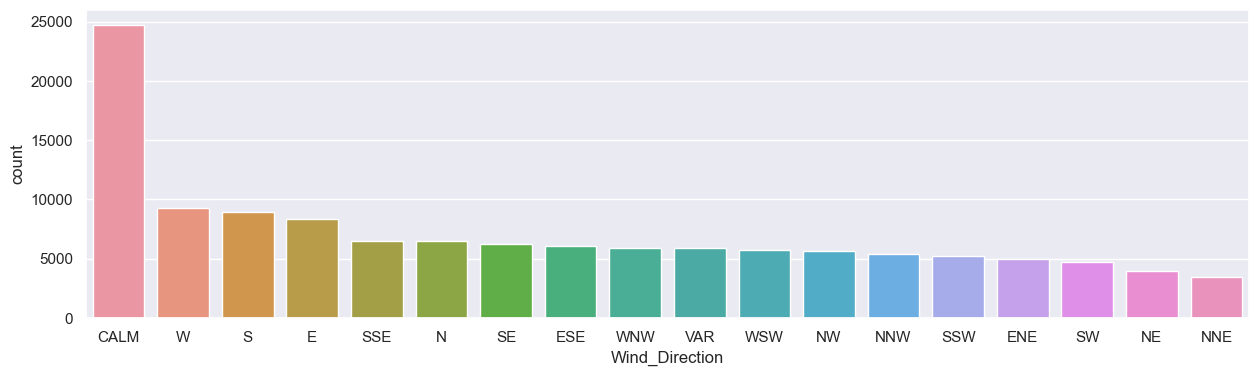

In [96]:
df_accidents_clean1['Wind_Direction'] = df_accidents_clean1['Wind_Direction'].str.upper()
df_accidents_clean1['Wind_Direction'] = np.where(df_accidents_clean1['Wind_Direction'] == "VARIABLE", "VAR", df_accidents_clean1['Wind_Direction'])
df_accidents_clean1['Wind_Direction'] = np.where(df_accidents_clean1['Wind_Direction'] == "WEST", "W", df_accidents_clean1['Wind_Direction'])
df_accidents_clean1['Wind_Direction'] = np.where(df_accidents_clean1['Wind_Direction'] == "EAST", "E", df_accidents_clean1['Wind_Direction'])
df_accidents_clean1['Wind_Direction'] = np.where(df_accidents_clean1['Wind_Direction'] == "SOUTH", "S", df_accidents_clean1['Wind_Direction'])
df_accidents_clean1['Wind_Direction'] = np.where(df_accidents_clean1['Wind_Direction'] == "NORTH", "N", df_accidents_clean1['Wind_Direction'])

#define figure size
sb.set(rc={"figure.figsize":(15, 4)}) #width=8, height=4
sb.countplot(data = df_accidents_clean1, x = 'Wind_Direction', order = df_accidents_clean1['Wind_Direction'].value_counts().index)

#### We see that there are 18 unique values for WInd direction, but majority of the accidents reported are during CALM condition. 

### Weather_Condition

In [97]:
weather_condition_cnt = df_accidents_clean1['Weather_Condition'].nunique()
#print("Unique Weather_Condition: ", df_accidents_clean1)
wind_direction_vals = df_accidents_clean1['Weather_Condition'].unique()
wind_direction_vals

array(['Fair', 'Mostly Cloudy', 'Fog', 'Partly Cloudy', 'Cloudy',
       'T-Storm', 'Rain', 'Showers in the Vicinity', 'Light Rain',
       'Light Snow', 'Smoke', 'Haze', nan, 'Heavy T-Storm',
       'Fair / Windy', 'Patches of Fog', 'T-Storm / Windy',
       'Mostly Cloudy / Windy', 'Shallow Fog', 'Light Rain with Thunder',
       'Heavy Rain', 'Thunder in the Vicinity', 'Cloudy / Windy', 'Snow',
       'Thunder', 'Light Rain / Windy', 'Partly Cloudy / Windy',
       'Light Drizzle', 'Heavy T-Storm / Windy', 'Rain / Windy', 'Mist',
       'Drizzle', 'Heavy Snow', 'Blowing Dust / Windy',
       'Heavy Rain / Windy', 'Wintry Mix', 'Light Rain Shower',
       'Funnel Cloud', 'Thunder / Windy', 'Rain Shower', 'Haze / Windy',
       'Blowing Dust', 'Snow and Thunder', 'Light Snow / Windy',
       'Drizzle and Fog', 'Snow / Windy', 'Fog / Windy',
       'N/A Precipitation', 'Heavy Drizzle', 'Light Freezing Rain',
       'Sleet', 'Smoke / Windy', 'Widespread Dust / Windy',
       'Light Free

In [98]:
print("Weather_Condition",df_accidents_clean1['Weather_Condition'].isna().sum())
print("Wind_Direction", df_accidents_clean1['Wind_Direction'].isna().sum())

Weather_Condition 491
Wind_Direction 1327


#### Top 10 weather conditions in the dataset

Most accidents occured in the Fair weather condition 

<Axes: xlabel='count', ylabel='Weather_Condition'>

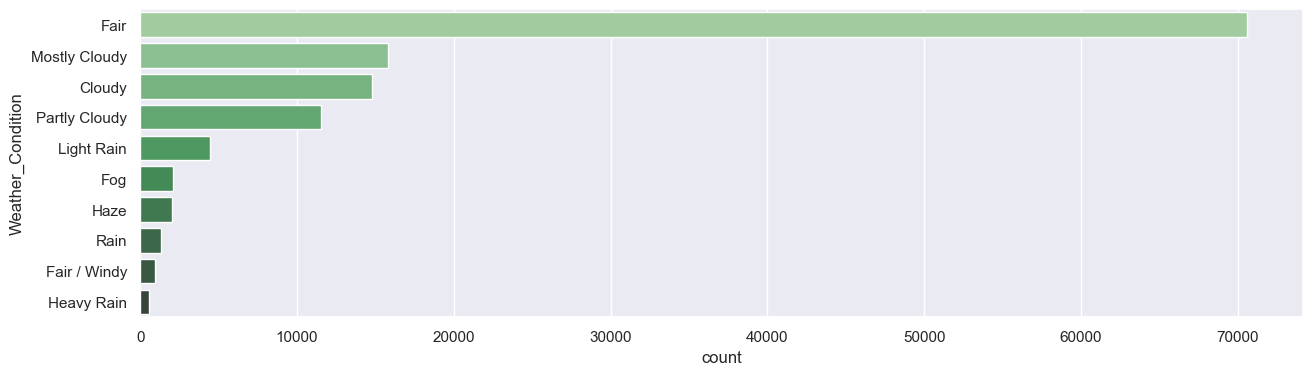

In [99]:
#print(df_accident_locs['Weather_Condition'].value_counts())
sb.countplot(y='Weather_Condition', data=df_accidents_clean1, palette="Greens_d",
              order=df_accidents_clean1.Weather_Condition.value_counts().iloc[:10].index)

#### Distribution of other Categorical variables

In [100]:
df_accidents_clean1.shape #128835

(128835, 41)

In [101]:
# columns = ['Side','Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Bump','Traffic_Calming', 'Traffic_Signal',
#              'Turning_Loop', 'Crossing','Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight']


# for col in columns:
#     sb.countplot(x=col,data=df_accidents_clean1, palette="rainbow", order=df_accidents_clean1[col].value_counts().index)
#     figure(figsize=(5, 5), dpi=20)
#     mp.show()

Based on the distribution and percentage of categories for each variable we can conclude that the following variables have only one categorical value for **Turning Loop**.

Also, 89% of **Traffic_Signal** values are **False**


In [102]:

print(df_accidents_clean1['Turning_Loop'].value_counts(normalize=True))

print(df_accidents_clean1['Traffic_Signal'].value_counts(normalize=True))


Turning_Loop
False    1.0
Name: proportion, dtype: float64
Traffic_Signal
False    0.890278
True     0.109722
Name: proportion, dtype: float64


In [103]:

print(df_accidents_clean1['Crossing'].value_counts(normalize=True))



Crossing
False    0.886941
True     0.113059
Name: proportion, dtype: float64


In [104]:
print(df_accidents_clean1['Junction'].value_counts(normalize=True))
print(df_accidents_clean1['No_Exit'].value_counts(normalize=True))

Junction
False    0.932767
True     0.067233
Name: proportion, dtype: float64
No_Exit
False    0.997803
True     0.002197
Name: proportion, dtype: float64


In [105]:
print("Crossing",df_accidents_clean1['Crossing'].isna().sum())
print("Traffic_Signal", df_accidents_clean1['Traffic_Signal'].isna().sum())

Crossing 0
Traffic_Signal 0


In [118]:
print(df_accidents_clean1['Crossing'].value_counts(normalize=True))

print(df_accidents_clean1['Traffic_Signal'].value_counts(normalize=True))

Crossing
False    0.886941
True     0.113059
Name: proportion, dtype: float64
Traffic_Signal
False    0.890278
True     0.109722
Name: proportion, dtype: float64


In [106]:

print(df_accidents_clean1['Bump'].value_counts(normalize=True))

print(df_accidents_clean1['Traffic_Calming'].value_counts(normalize=True))

Bump
False    0.999426
True     0.000574
Name: proportion, dtype: float64
Traffic_Calming
False    0.998859
True     0.001141
Name: proportion, dtype: float64


In [107]:
print("Bump",df_accidents_clean1['Crossing'].isna().sum())
print("Traffic_Calming", df_accidents_clean1['Traffic_Signal'].isna().sum())

Bump 0
Traffic_Calming 0


In [108]:
print(df_accidents_clean1['Sunrise_Sunset'].value_counts(normalize=True))

print(df_accidents_clean1['Civil_Twilight'].value_counts(normalize=True))

print(df_accidents_clean1['Stop'].value_counts(normalize=True))

print(df_accidents_clean1['Give_Way'].value_counts(normalize=True))

Sunrise_Sunset
Day      0.662101
Night    0.337899
Name: proportion, dtype: float64
Civil_Twilight
Day      0.703016
Night    0.296984
Name: proportion, dtype: float64
Stop
False    0.969325
True     0.030675
Name: proportion, dtype: float64
Give_Way
False    0.997873
True     0.002127
Name: proportion, dtype: float64


In [109]:
print("Sunrise_Sunset",df_accidents_clean1['Sunrise_Sunset'].isna().sum())
print("Civil_Twilight", df_accidents_clean1['Civil_Twilight'].isna().sum())

Sunrise_Sunset 350
Civil_Twilight 350


In [110]:
df_accidents_clean1.drop(['Visibility(mi)','Precipitation(in)','Side','Turning_loop','Weather_Condition','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'], axis=1, inplace= True)

We see that the distribution of NaN's in both attributes are same. Based on the correlation data, 'Civil_Twilight', 'Nautical_Twilight' & 'Astronomical_Twilight' are correlated to each other and to 'Sunrise_Sunset' attribute, so we can exclude them from the dataframe and keep only 'Sunrise_Sunset'.

We can remove Traffic_Calming, since it has just the FALSE value for all the records

## Conclusion

Based on our analysis, the following variables are relavent and should be considered for clustering analysis.

#### Continuous variables:

1. Temperature - continuous variable. Outliers should be eliminated or imputed.

2. Windspeed - continuous variable. Outliers should be eliminated or imputed.

3. Air pressure - continuous variable. Outliers should be eliminated or imputed.

4. Distance(mi) - continuous variable.



#### In addition to the above, geographical attributes required for aggregation.

6. State - Categorical, but will not be fed to the KMeans Model

7. County - Categorical, but should be used with State attribute as same County name exist in multiple States. Will not be fed to the KMeans Model 

8. Zip Code - Categorical, but will not be fed to the KMeans Model.
We will also consider the Lat Long attributes since they would be needed for Visualization

#### Categorical variables:

 9.  Stop               
 10.   Traffic_Signal      
 11.   Give_Way            
 12.   Wind_Direction   
 13.  Junction           
 14.  Crossing     
 15. Sunrise_Sunset




In [111]:
df_accidents_clean1.head()
df_accidents_clean1.shape

(128835, 33)

In [112]:
df = df_accidents_clean1
df.shape

(128835, 33)

In [113]:

print("Dataframe shape before removing NaN's in any attributes: ", df.shape)

#df.dropna(subset=['Start_Time','Severity','Start_Lng','Start_Lat','End_Lng','End_Lat','State','County','Zipcode'], how='any', inplace=True)

print("Dataframe shape after removing NaN's in any attributes: ", df.shape)

#df_final = df[['State','County','Zipcode','Temperature(F)','Wind_Speed(mph)','Pressure(in)','Distance(mi)','Humidity(%)','Severity','Weather_Condition','Wind_Direction','Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop','Give_Way' ,'Crossing','Traffic_Calming', 'Traffic_Signal','Turning_Loop', 'Sunrise_Sunset']]

df_final = df
df_final.head()


Dataframe shape before removing NaN's in any attributes:  (128835, 33)
Dataframe shape after removing NaN's in any attributes:  (128835, 33)


,Severity,Start_Lng,Start_Lat,End_Lng,End_Lat,Distance(mi),Start_Time,End_Time,Country,Weather_Timestamp,...,Station,Stop,Amenity,Bump,Crossing,Give_Way,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,2,-120.492822,34.661189,-120.492442,34.661189,0.022,2022-08-20 13:13:00+00:00,2022-08-20 15:22:45.000000000,US,2022-08-20 12:56:00,...,False,False,False,False,False,False,False,True,False,Day
1,2,-118.985176,35.395484,-118.985995,35.395476,0.046,2020-12-04 01:46:00+00:00,2020-12-04 04:13:09,US,2020-12-04 01:54:00,...,False,False,False,False,False,False,False,False,False,Night
2,2,-85.682508,30.191010,-85.682530,30.190329,0.047,2021-08-13 16:48:00+00:00,2021-08-13 19:09:09.000000000,US,2021-08-13 16:56:00,...,False,False,False,False,False,False,False,False,False,Day
3,2,-96.804018,32.868947,-96.804014,32.869500,0.038,2022-10-12 13:59:30+00:00,2022-10-12 15:33:53,US,2022-10-12 13:53:00,...,True,False,False,False,False,False,False,False,False,Day
4,2,-117.161407,32.771645,-117.154680,32.730856,2.845,2022-02-18 16:53:00+00:00,2022-02-18 18:59:00,US,2022-02-18 16:53:00,...,False,False,False,False,False,False,False,False,False,Day


In [114]:
print(df_final['Sunrise_Sunset'].value_counts(normalize=True))

Sunrise_Sunset
Day      0.662101
Night    0.337899
Name: proportion, dtype: float64


In [115]:
print(df_final.isna().sum())

Severity                 0
Start_Lng                0
Start_Lat                0
End_Lng              25521
End_Lat              25521
Distance(mi)             0
Start_Time               0
End_Time                 0
Country                  0
Weather_Timestamp        0
Temperature(F)         973
Wind_Chill(F)         1959
Humidity(%)           1180
Pressure(in)           276
Wind_Direction        1327
Wind_Speed(mph)       1327
County                   0
State                    0
Zipcode                  0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset         350
dtype: int64


#### Finally we will perform the data export with the variables specified above


In [116]:
## Exporting out the final data set for data pre-processing ##
df_accidents_export=df_accidents_clean1[['Start_Time','Severity','Start_Lng','Start_Lat','End_Lng','End_Lat','Distance(mi)','State','County','Zipcode','Temperature(F)','Wind_Speed(mph)','Pressure(in)', 'Humidity(%)','Wind_Direction','Junction','No_Exit','Railway','Roundabout','Station','Stop','Give_Way','Crossing','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset']]
df_accidents_export=df_accidents_export.drop_duplicates(ignore_index=False)
df_accidents_export.to_csv('Final_PreProcessed_Acc_Data.csv',header=True, index=False)

In [117]:
df_accidents_export.shape #127659

(127659, 27)